In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [64]:
# Đọc dữ liệu
df = pd.read_csv("cleaned_cars_dataset.csv")
df.head(10)


,Make,Car_Name,Engine_Type,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Fuel_Type,Seats,Torque_Nm
0,FERRARI,Sf90 Stradale,V8,3990.0,963.0,340.0,2.5,1100000.0,plug in hybrid,2,800.0
1,ROLLS ROYCE,Phantom,V12,6749.0,563.0,250.0,5.3,460000.0,petrol,5,900.0
2,FORD,Ka+,1.2L PETROL,1200.0,77.5,165.0,10.5,13500.0,petrol,5,120.0
3,MERCEDES,Gt 63 S,V8,3982.0,630.0,250.0,3.2,161000.0,petrol,4,900.0
4,AUDI,Audi R8 Gt,V10,5204.0,602.0,320.0,3.6,253290.0,petrol,2,560.0
5,BMW,Mclaren 720S,V8,3994.0,710.0,341.0,2.9,499000.0,petrol,2,770.0
6,ASTON MARTIN,Vantage F1,V8,3982.0,656.0,314.0,3.6,193440.0,petrol,2,685.0
7,BENTLEY,Continental Gt Azure,V8,3996.0,550.0,318.0,4.0,311000.0,petrol,4,900.0
8,LAMBORGHINI,Veneno Roadster,V12,6498.0,750.0,356.0,2.9,4500000.0,petrol,2,690.0
9,FERRARI,F8 Tributo,V8,3900.0,710.0,340.0,2.9,280000.0,petrol,2,770.0


# Kiểm tra dữ liệu và giá trị thiếu

In [65]:
df.info()
df.isna().sum()

# Tỉ lệ thiếu
missing_ratio = df.isna().mean() * 100
missing_ratio


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1214 non-null   object 
 1   Car_Name                1214 non-null   object 
 2   Engine_Type             1214 non-null   object 
 3   CC_Capacity             1083 non-null   float64
 4   Horsepower              1214 non-null   float64
 5   Top_Speed_kmh           1214 non-null   float64
 6   Acceleration_0_100_sec  1199 non-null   float64
 7   Price_USD               1213 non-null   float64
 8   Fuel_Type               1214 non-null   object 
 9   Seats                   1214 non-null   int64  
 10  Torque_Nm               1213 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 104.5+ KB


Make                       0.000000
Car_Name                   0.000000
Engine_Type                0.000000
CC_Capacity               10.790774
Horsepower                 0.000000
Top_Speed_kmh              0.000000
Acceleration_0_100_sec     1.235585
Price_USD                  0.082372
Fuel_Type                  0.000000
Seats                      0.000000
Torque_Nm                  0.082372
dtype: float64

# Điền giá trị thiếu

In [67]:

# Kiểm tra dữ liệu thiếu ban đầu
missing_percent = df.isnull().mean() * 100
print(" Tỷ lệ phần trăm giá trị bị thiếu ở mỗi cột:\n")
print(missing_percent[missing_percent > 0].sort_values(ascending=False))

#  Điền giá trị thiếu cho các cột số (numeric)

# Dùng median (trung vị) để tránh ảnh hưởng bởi outlier
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f" Đã điền giá trị thiếu trong cột '{col}' bằng median ({median_value})")

# 3 Kiểm tra lại để đảm bảo không còn thiếu

print("\n Kiểm tra lại số lượng giá trị thiếu sau khi xử lý:")
print(df.isnull().sum())


# 4️ (Tuỳ chọn) Kiểm tra tổng số dòng trước/sau

print(f"\n Tổng số dòng sau khi xử lý: {df.shape[0]}")

 Tỷ lệ phần trăm giá trị bị thiếu ở mỗi cột:

Series([], dtype: float64)

 Kiểm tra lại số lượng giá trị thiếu sau khi xử lý:
Make                      0
Car_Name                  0
Engine_Type               0
CC_Capacity               0
Horsepower                0
Top_Speed_kmh             0
Acceleration_0_100_sec    0
Price_USD                 0
Fuel_Type                 0
Seats                     0
Torque_Nm                 0
dtype: int64

 Tổng số dòng sau khi xử lý: 1214


## này là t dùng code trên để kiểm tra thêm đả đủ chưa nghe chứ bước kiểm tra giá thị thiếu bây nhìn 0,0,0,0 thì hiểu nó điền hết rồi

In [68]:
df.info()
df.isna().sum()

# Tỉ lệ thiếu
missing_ratio = df.isna().mean() * 100
missing_ratio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1214 non-null   object 
 1   Car_Name                1214 non-null   object 
 2   Engine_Type             1214 non-null   object 
 3   CC_Capacity             1214 non-null   float64
 4   Horsepower              1214 non-null   float64
 5   Top_Speed_kmh           1214 non-null   float64
 6   Acceleration_0_100_sec  1214 non-null   float64
 7   Price_USD               1214 non-null   float64
 8   Fuel_Type               1214 non-null   object 
 9   Seats                   1214 non-null   int64  
 10  Torque_Nm               1214 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 104.5+ KB


Make                      0.0
Car_Name                  0.0
Engine_Type               0.0
CC_Capacity               0.0
Horsepower                0.0
Top_Speed_kmh             0.0
Acceleration_0_100_sec    0.0
Price_USD                 0.0
Fuel_Type                 0.0
Seats                     0.0
Torque_Nm                 0.0
dtype: float64

### code lấy ở chỗ kiểm tra lúc đầu đó, cho ae xem lại thôi chứ cái này ít bữa xóa ko để lại mô


# Loại bỏ hoặc xử lý cột không cần thiết


In [69]:
# 'Car_Name' quá chi tiết, có thể bỏ để tránh overfitting
df = df.drop(columns=["Car_Name"])


### ta loại cột ni vì thấy cột MAKE có tên hãng xe rồi cột ni ko cần thiết, có nó model bị nhiễu nữa nên bỏ :))

# tạo đặt trưng mới

In [70]:
# Hiệu suất: sức mạnh tăng tốc
df["Performance_Index"] = df["Horsepower"] / df["Acceleration_0_100_sec"]


    Horsepower  Acceleration_0_100_sec  Performance_Index
0        963.0                     2.5         385.200000
1        563.0                     5.3         106.226415
2         77.5                    10.5           7.380952
3        630.0                     3.2         196.875000
4        602.0                     3.6         167.222222
5        710.0                     2.9         244.827586
6        656.0                     3.6         182.222222
7        550.0                     4.0         137.500000
8        750.0                     2.9         258.620690
9        710.0                     2.9         244.827586
10       789.0                     2.9         272.068966


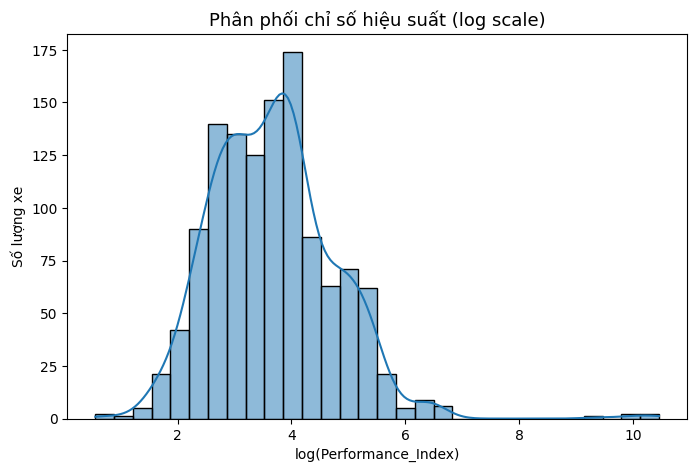

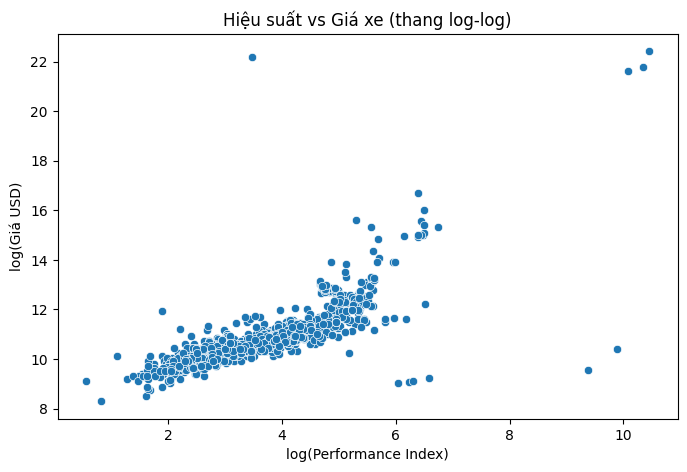

Hệ số tương quan giữa Performance_Index và Giá xe: 0.744


In [71]:
#  Kiểm tra vài dòng đầu
print(df[["Horsepower", "Acceleration_0_100_sec", "Performance_Index"]].head(11))

# 3. Biểu đồ phân phối chỉ số hiệu suất

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["Performance_Index"]), kde=True, bins=30)
plt.title("Phân phối chỉ số hiệu suất (log scale)", fontsize=13)
plt.xlabel("log(Performance_Index)")
plt.ylabel("Số lượng xe")
plt.show()


#  So sánh hiệu suất với giá xe

plt.figure(figsize=(8,5))
sns.scatterplot(x=np.log1p(df["Performance_Index"]), y=np.log1p(df["Price_USD"]))
plt.title("Hiệu suất vs Giá xe (thang log-log)")
plt.xlabel("log(Performance Index)")
plt.ylabel("log(Giá USD)")
plt.show()



# 5. Kiểm tra tương quan giữa hiệu suất và giá xe

corr = df["Performance_Index"].corr(df["Price_USD"])
print(f"Hệ số tương quan giữa Performance_Index và Giá xe: {corr:.3f}")


## Đọc để hiểu cũng được:
-Nếu hai xe có cùng mã lực nhưng khác thời gian tăng tốc, đặc trưng này sẽ thể hiện rõ sự khác biệt.=> làm giảm nhiễu á

-Khi dự đoán các nhãn như “xe thể thao”, “xe tiết kiệm”, hoặc “hiệu suất cao”, mô hình dễ phân biệt hơn.=> giúp phân loại tốt hơn

Tối ưu hóa các model tuyến tính (Linear/Logistic Regression): vì mối quan hệ thực giữa Horsepower và Acceleration thường là phi tuyến.

Nói tóm lại là nó giúp model tốt hơn á khỏi phải học riêng lẽ

In [72]:
bins = [0, 50, 150, 400, df["Performance_Index"].max()]
labels = ["Thấp", "Trung bình", "Cao", "Siêu xe"]
df["Performance_Category"] = pd.cut(df["Performance_Index"], bins=bins, labels=labels)


Giúp mô hình hiểu dạng nhóm thay vì giá trị thô

Giúp phân tích trực quan và thống kê dễ hiểu hơn( có vẽ biểu đồ rồi ae nhìn thử ok ko , ko thì sửa :)))

Giúp giảm nhiễu (noise) nếu dữ liệu gốc dao động quá nhiều( kiểu nó giúp model học được ranh giới hiệu suất á , kiểu như có cái hiệu suất ni model tốt hơn thay vì chỉ có công suất động cơ với thời gian tăng tốc)

# Trước khi mã hóa (Label Encoding)
này để ae xem nó hoạt động như nào thôi 

In [73]:
# Xem các cột dạng chữ trước khi mã hóa
categorical_cols = df.select_dtypes(include='object').columns
print("Các cột dạng chữ:", categorical_cols)
print(df[categorical_cols].head(10))


Các cột dạng chữ: Index(['Make', 'Engine_Type', 'Fuel_Type'], dtype='object')
           Make  Engine_Type       Fuel_Type
0       FERRARI           V8  plug in hybrid
1   ROLLS ROYCE          V12          petrol
2          FORD  1.2L PETROL          petrol
3      MERCEDES           V8          petrol
4          AUDI          V10          petrol
5           BMW           V8          petrol
6  ASTON MARTIN           V8          petrol
7       BENTLEY           V8          petrol
8   LAMBORGHINI          V12          petrol
9       FERRARI           V8          petrol


# Mã hóa biến phân loại (Categorical Encoding)

In [74]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
    print(f"\nCột '{col}' đã được mã hóa:")
    print(dict(zip(le.classes_[:5], le.transform(le.classes_[:5]))))  # In 5 giá trị đầu




Cột 'Make' đã được mã hóa:
{'ACURA': np.int64(0), 'ASTON MARTIN': np.int64(1), 'AUDI': np.int64(2), 'BENTLEY': np.int64(3), 'BMW': np.int64(4)}

Cột 'Engine_Type' đã được mã hóa:
{'0.36L INLINE-2': np.int64(0), '0.66L INLINE-3': np.int64(1), '0.7L 3-CYLINDER': np.int64(2), '1.0L ECOBOOST / 1.5L': np.int64(3), '1.0L ECOBOOST / 1.5L / 2.0L': np.int64(4)}

Cột 'Fuel_Type' đã được mã hóa:
{'cng/petrol': np.int64(0), 'diesel': np.int64(1), 'diesel hybrid': np.int64(2), 'diesel/petrol': np.int64(3), 'electric': np.int64(4)}


# Trước và sau khi chuẩn hóa (Scaling)

In [75]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Xem dữ liệu trước khi scale
print("Giá trị trung bình trước khi scale:")
print(df[numeric_cols].mean().head())

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Giá trị trung bình trước khi scale:
Make               17.807249
Engine_Type       223.079077
CC_Capacity      2957.376442
Horsepower       1071.197282
Top_Speed_kmh     216.581549
dtype: float64


In [76]:
# Xem lại sau khi scale
print("\nGiá trị trung bình sau khi scale (gần 0):")
print(df[numeric_cols].mean().head())

print("\nDữ liệu sau khi chuẩn hóa:")
print(df.head(3))


Giá trị trung bình sau khi scale (gần 0):
Make             0.000000e+00
Engine_Type      1.170581e-17
CC_Capacity      4.682324e-17
Horsepower      -1.170581e-17
Top_Speed_kmh    2.341162e-16
dtype: float64

Dữ liệu sau khi chuẩn hóa:
       Make  Engine_Type  CC_Capacity  Horsepower  Top_Speed_kmh  \
0 -1.200222     1.256217     0.592794   -0.009089       2.327175   
1  0.880257     1.177036     2.176643   -0.042693       0.630137   
2 -1.077841    -1.950617    -1.008851   -0.083479      -0.972620   

   Acceleration_0_100_sec  Price_USD  Fuel_Type     Seats  Torque_Nm  \
0               -1.532560  -0.050700   2.251853 -0.372793  -0.055320   
1               -0.685091  -0.053492   0.463920 -0.036892  -0.049408   
2                0.888780  -0.055439   0.463920 -0.036892  -0.095518   

   Performance_Index Performance_Category  
0           0.134993                  Cao  
1          -0.035713           Trung bình  
2          -0.096197                 Thấp  


In [83]:
from sklearn.model_selection import train_test_split

# X là tập đặc trưng, y là biến mục tiêu (giá xe)
X = df.drop(columns=['Price_USD'])
y = df['Price_USD']

# Chia train/test 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Kích thước X_train:", X_train.shape)
print("Kích thước X_test:", X_test.shape)
print("Kích thước y_train:", y_train.shape)
print("Kích thước y_test:", y_test.shape)





Kích thước X_train: (971, 11)
Kích thước X_test: (243, 11)
Kích thước y_train: (971,)
Kích thước y_test: (243,)


# Này bucow kiểm tra dữ liệu xem thử đã qua số hết chưa nên ae ko cần để ý

In [84]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Missing values:", df.isnull().sum().sum())
print(df.head())


X_train shape: (971, 11)
X_test shape: (243, 11)
Missing values: 0
       Make  Engine_Type  CC_Capacity  Horsepower  Top_Speed_kmh  \
0 -1.200222     1.256217     0.592794   -0.009089       2.327175   
1  0.880257     1.177036     2.176643   -0.042693       0.630137   
2 -1.077841    -1.950617    -1.008851   -0.083479      -0.972620   
3  0.268351     1.256217     0.588202   -0.037064       0.630137   
4 -1.934509     1.167138     1.289711   -0.039416       1.950055   

   Acceleration_0_100_sec  Price_USD  Fuel_Type     Seats  Torque_Nm  \
0               -1.532560  -0.050700   2.251853 -0.372793  -0.055320   
1               -0.685091  -0.053492   0.463920 -0.036892  -0.049408   
2                0.888780  -0.055439   0.463920 -0.036892  -0.095518   
3               -1.320692  -0.054796   0.463920 -0.148859  -0.049408   
4               -1.199625  -0.054393   0.463920 -0.372793  -0.069507   

   Performance_Index Performance_Category  
0           0.134993                  Cao  
1  